In [1]:
!unzip smartphone+based+recognition+of+human+activities+and+postural+transitions.zip



/bin/bash: line 1: unzip: command not found


In [2]:
import zipfile
import os

with zipfile.ZipFile('UCI HAR Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('')


In [3]:
import numpy as np

In [33]:

def raw_data(folder):
    signals = []
    types = [
        'body_acc_x','body_acc_y','body_acc_z','total_acc_x','total_acc_y','total_acc_z',
        'body_gyro_x','body_gyro_y','body_gyro_z'
    ]
    for signal in types:
        path = f"UCI HAR Dataset/{folder}/Inertial Signals/{signal}_{folder}.txt"
        data = np.loadtxt(path)
        signals.append(data)
    X = np.dstack(signals) # to stack along the 3rd dim 
    y = (np.loadtxt(f"UCI HAR Dataset/{folder}/y_{folder}.txt"))-1 # for starting from 0 index
    return X,y

In [34]:
X_train_dl, y_train_dl = raw_data('train')
X_test_dl, y_test_dl = raw_data('test')

In [35]:
print(X_train_dl.shape) 
print(X_test_dl.shape)

(7352, 128, 9)
(2947, 128, 9)


In [36]:
print(np.unique(y_test_dl))  


[0. 1. 2. 3. 4. 5.]


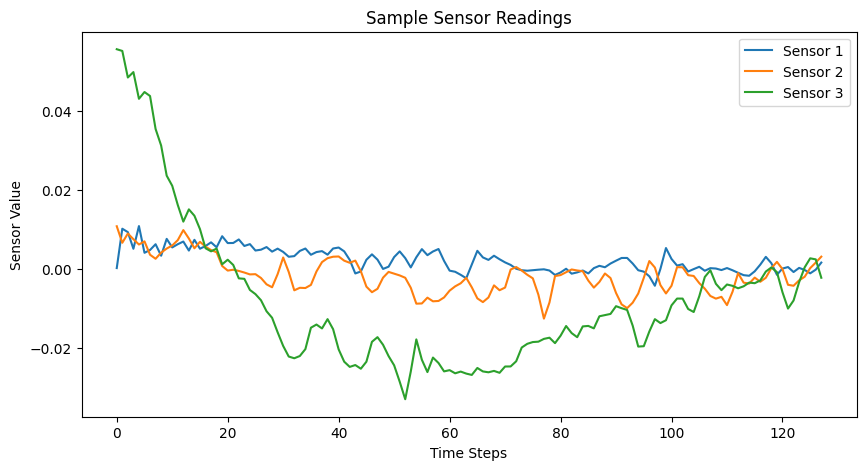

In [37]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 5))
for i in range(3):  # ploting the 3 signals to visulize the data
    plt.plot(X_train[0, :, i], label=f"Sensor {i+1}")

plt.title("Sample Sensor Readings")
plt.xlabel("Time Steps")
plt.ylabel("Sensor Value")
plt.legend()
plt.show()


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [39]:
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(128, 9)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(6, activation='softmax')  #  there are 6 activity classes
])

/home/ananya/miniconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [41]:
history = lstm_model.fit(X_train_dl, y_train_dl, epochs=15, batch_size=32, validation_split=0.2)


Epoch 1/15


2025-03-01 18:43:35.099649: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


184/184 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.4765 - loss: 1.2746 - val_accuracy: 0.7104 - val_loss: 0.7872
Epoch 2/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.7314 - loss: 0.6629 - val_accuracy: 0.7580 - val_loss: 0.7061
Epoch 3/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.7963 - loss: 0.5455 - val_accuracy: 0.8273 - val_loss: 0.5594
Epoch 4/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.8892 - loss: 0.3315 - val_accuracy: 0.8763 - val_loss: 0.4644
Epoch 5/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9174 - loss: 0.2447 - val_accuracy: 0.8865 - val_loss: 0.4026
Epoch 6/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9507 - loss: 0.1477 - val_accuracy: 0.8926 - val_loss: 0.4221
Epoch 7/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9481 - loss: 0.1409 - val_accuracy: 0.8926 - val_loss: 0.4503
Epoch 8/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9512 - loss: 0.1349 - val_accurac

In [42]:
lstm_accuracy = lstm_model.evaluate(X_test_dl, y_test_dl)[1]


print(f"LSTM Test Accuracy: {lstm_accuracy:.4f}")



93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8497 - loss: 0.4271
LSTM Test Accuracy: 0.9013


In [43]:
print("Train shape:", X_train_dl.shape)  # Should be (7352, 128, 9)
print("Test shape:", X_test_dl.shape)    # Should be (2947, 128, 9)


Train shape: (7352, 128, 9)
Test shape: (2947, 128, 9)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 9)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # 6 classes
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(X_train_dl, y_train_dl, epochs=15, batch_size=32, validation_split=0.2)






/home/ananya/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


I0000 00:00:1740835006.900888   13504 service.cc:146] XLA service 0x7ff304039c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740835006.901181   13504 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-03-01 18:46:47.007448: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


 13/184 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3664 - loss: 1.5680 

I0000 00:00:1740835011.962178   13504 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


184/184 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.6605 - loss: 0.8328 - val_accuracy: 0.8892 - val_loss: 0.3778
Epoch 2/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9398 - loss: 0.1691 - val_accuracy: 0.9035 - val_loss: 0.3656
Epoch 3/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9481 - loss: 0.1232 - val_accuracy: 0.9109 - val_loss: 0.4258
Epoch 4/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9588 - loss: 0.0970 - val_accuracy: 0.9130 - val_loss: 0.4986
Epoch 5/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9584 - loss: 0.0917 - val_accuracy: 0.8987 - val_loss: 0.4469
Epoch 6/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9589 - loss: 0.0945 - val_accuracy: 0.9007 - val_loss: 0.5241
Epoch 7/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9568 - loss: 0.0964 - val_accuracy: 0.9048 - val_loss: 0.5424
Epoch 8/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9633 - loss: 0.0764 - val_accuracy: 0.8980 - va

In [46]:

cnn_accuracy = cnn_model.evaluate(X_test_dl, y_test_dl)[1]
print(f"1D CNN Test Accuracy: {cnn_accuracy:.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8568 - loss: 0.8109
1D CNN Test Accuracy: 0.9033


In [47]:
import tsfel
import pandas as pd

In [48]:
cfg = tsfel.get_features_by_domain()

In [49]:
import pandas as pd
import numpy as np
X_train, y_train = raw_data('train')
X_test, y_test = raw_data('test')


In [53]:
import tsfel
import pandas as pd
import numpy as np
from tqdm import tqdm

def time_series_features(X, sampling_rate=50):
    cfg = tsfel.get_features_by_domain()
    extracted_features = []

    for domain in cfg.keys():
        for feature in cfg[domain]:
            if "Sampling frequency" in cfg[domain][feature]:
                cfg[domain][feature]["Sampling frequency"] = sampling_rate

    num_windows = len(X)
    start_time = time.time()

    for window in tqdm(X, desc="Extracting Features", unit="window"): # added tqdm to check on time required as it was taking very long
        feature_vector = []
        for i in range(window.shape[1]):
            df = pd.DataFrame(window[:, i])
            features = tsfel.time_series_features_extractor(cfg, df, verbose=0, fs=sampling_rate)
            feature_vector.extend(features.values.flatten())

        extracted_features.append(feature_vector)

    total_time = time.time() - start_time
    print(f"Total Feature Extraction Time: {total_time:.2f}s")

    return np.array(extracted_features)

In [54]:
X_train_features = time_series_features(X_train, sampling_rate=50)
X_test_features = time_series_features(X_test, sampling_rate=50)

Extracting Features: 100%|██████████████████████████████████████████████████████| 7352/7352 [26:07<00:00,  4.69window/s]


Total Feature Extraction Time: 1567.08s


Extracting Features: 100%|██████████████████████████████████████████████████████| 2947/2947 [10:37<00:00,  4.63window/s]


Total Feature Extraction Time: 637.18s


In [55]:
import numpy as np

# saving features
np.save("X_train_features.npy", X_train_features)
np.save("X_test_features.npy", X_test_features)

# for loading
X_train_features = np.load("X_train_features.npy")
X_test_features = np.load("X_test_features.npy")


In [56]:
print(X_train_features.shape)
print(X_test_features.shape)


(7352, 1404)
(2947, 1404)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [58]:
#random forest
rf = RandomForestClassifier()
rf.fit(X_train_features, y_train)
y_pred_rf = rf.predict(X_test_features)
print("random forest acc:", accuracy_score(y_test, y_pred_rf))


random forest acc: 0.9280624363759755


In [59]:
#svm
svm = SVC()
svm.fit(X_train_features, y_train)
y_pred_svm = svm.predict(X_test_features)
print("svm accuracy:", accuracy_score(y_test, y_pred_svm))


svm accuracy: 0.8133695283338989


In [60]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_features, y_train)
y_pred_lr = lr.predict(X_test_features)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8822531387852053


/home/ananya/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
X_train_authors = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None).values
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None).values.ravel()

X_test_authors = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None).values
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None).values.ravel()


/tmp/ipykernel_13375/1908774722.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train_authors = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None).values
/tmp/ipykernel_13375/1908774722.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test_authors = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None).values


In [62]:
print(X_train_authors.shape)  
print(y_train.shape)       


(7352, 561)
(7352,)


In [63]:

rf.fit(X_train_authors, y_train)
y_pred_authors_rf = rf.predict(X_test_authors)
print(" ramdom forest acc(author_features):", accuracy_score(y_test, y_pred_authors_rf))


 ramdom forest acc(author_features): 0.9246691550729556
